<a href="https://colab.research.google.com/github/Marion13673/TelecomX_PARTE2_LATAM/blob/main/Conclusi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CONCLUSIÓN**   



| Estrategia                            | Intervalo Recall (IC 95%) | Comentario                                                                                       |
|:-------------------------------------:|:-------------------------:|:------------------------------------------------------------------------------------------------:|
| KFold sin estratificar                |         0.39-0.56         |<div align='justify'>indica alta variabilidad entre folds y posible inestabilidad en la detección de la clase minoritaria. |                                                                                     |
|                                       |                           |                                                                                       |
| Árbol sin balanceo -con estratificar  |         0.33-0.55         |<div align='justify'>Esta amplitud refleja una variabilidad moderada entre folds, lo que limita la confiabilidad del modelo en contextos donde la detección precisa del churn es prioritaria.                                                                                       |
|                                       |                           |                                                                                       |
| SMOTE externo                         |         0.80-0.81         |<div align='justify'>el modelo no solo mejora significativamente la detección de cancelaciones, sino que lo hace de forma consistente, lo cual es clave en aplicaciones donde minimizar falsos negativos es prioritario.                                                                                       |
|                                       |                           |                                                                                       |
| SMOTE en pipeline                     |      0.51-070             |<div align='justify'>Aunque mejora respecto a modelos sin balanceo, su estabilidad es menor que la obtenida con SMOTE externo, lo que sugiere que la forma de integrar el balanceo puede influir en la consistencia del modelo.                                                                                       |
|                                       |                           |                                                                                       |
| NearMiss v3 (undersampling)           |      0.64-0.71                      |   es más estrecho que el obtenido con SMOTE, lo que sugiere mayor estabilidad entre folds. Esto refuerza la idea de que el undersampling puede ofrecer resultados más consistentes en ciertos contextos, aunque con menor cobertura de la clase minoritaria.                                                                                     |                  

In [50]:
import pandas as pd

# Definir recall scores y el total de churn
recall_scores = {
    'KFold sin estratificar': 0.47,
    'Árbol sin balanceo -con estratificar	': 0.44,

}
support = 1869

# Calcular falsos negativos para cada modelo
false_negatives = {model: float((1 - recall) * support) for model, recall in recall_scores.items()}

# Convertir en DatFrame
fn_df = pd.DataFrame(list(false_negatives.items()), columns=['Model', 'False Negatives'])

# Imprimir resultados
print('Sin balanceo')
print(fn_df)

Sin balanceo
                                    Model  False Negatives
0                  KFold sin estratificar           990.57
1  Árbol sin balanceo -con estratificar\t          1046.64


In [51]:
import pandas as pd

# Definir recall scores y el total de churn
recall_scores = {
    'SMOTE externo ': 0.81,
    'Árbol + SMOTE': 0.60,
    'NearMiss V3': 0.67,
    'Random Forest': 0.44,
    'XGBoost': 0.50
}
support = 3778

# Calcular falsos negativos para cada modelo
false_negatives = {model: float((1 - recall) * support) for model, recall in recall_scores.items()}

# Convertir en DatFrame
fn_df = pd.DataFrame(list(false_negatives.items()), columns=['Model', 'False Negatives'])

# Imprimir resultados
print('Con balanceo')
print(fn_df)

Con balanceo
            Model  False Negatives
0  SMOTE externo            717.82
1   Árbol + SMOTE          1511.20
2     NearMiss V3          1246.74
3   Random Forest          2115.68
4         XGBoost          1889.00


| Estrategia                           |  Churn  |    Recall promedio    |Intervalo Recall (IC 95%) | Falsos negativos  | Comentario clave                                      |
|:------------------------------------:|:-------:|:---------------------:|:------------------------:|:-----------------:|:-----------------------------------------------------:|
|SMOTE externo                         |  3778   |          0.81         |        0.80-0.81         |       718         |<div align='justify'>Alto recall, estrecho IC, mejor cobertura      |
|
|árbol + SMOTE                         |  3778   |          0.60         |        0.51-0.70         |      1511         |<div align='justify'>Mejora con SMOTE, pero menos robusto        |
|
|NearMiss v3(undersampling)            |  3778   |          0.67         |        0.64-0.71         |      1247         |<div align='justify'>Buen recall, pero más falsos         negativos      |
|                                      |         |                       |                          |                   |                                                      |
|XGBoost                               |  3778   |          0.50         |        0.47-0.54         |      1889         |<div align='justify'>Estable pero bajo recall         |
|                                      |         |                       |                          |                   |                                                      |
|Random Forest                         |  3778   |          0.44         |        0.42-0.46         |      2116         |<div align='justify'>Preciso pero poco sensible       |
|                                                |                       |                          |                   |                                                      |
|Árbol sin balanceo -con estratificar  |  1869   |          0.44         |        0.33-0.55         |      1047         |<div align='justify'>Inestable y menos eficaz         |  
|                                                |                       |                          |                   |                                                      |
|KFold sin estratificar (sin balanceo) |   1869  |          0.47         |        0.39-0.56         |       991         |<div align='justify'> Métrica engañosa por falta de estratificación|


In [67]:
import statistics
from scipy.stats import mode
import numpy as np


recall_score=[0.80555556, 0.80529801, 0.80529801, 0.8015873 , 0.81481481]
media = statistics.mean(recall_score)
mediana_Q2=statistics.median(recall_score)
desv_std=statistics.stdev(recall_score)
moda = mode(recall_score, keepdims=True)[0][0]
Q1 = np.percentile(recall_score, 25)
Q3 = np.percentile(recall_score, 75)
DataFrame=pd.DataFrame({'Métrica':['media','desv_std','moda','mediana_Q2','Q1','Q3'],'Valores':[media,desv_std,moda,mediana_Q2,Q1,Q3]})
DataFrame


,Métrica,Valores
0,media,0.806511
1,desv_std,0.004926
2,moda,0.805298
3,mediana_Q2,0.805298
4,Q1,0.805298
5,Q3,0.805556


/tmp/ipython-input-2782842410.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Valores', y='Categoría', data=data, palette=zoop_palette)
/tmp/ipython-input-2782842410.py:18: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Valores', y='Categoría', data=data, palette=zoop_palette)


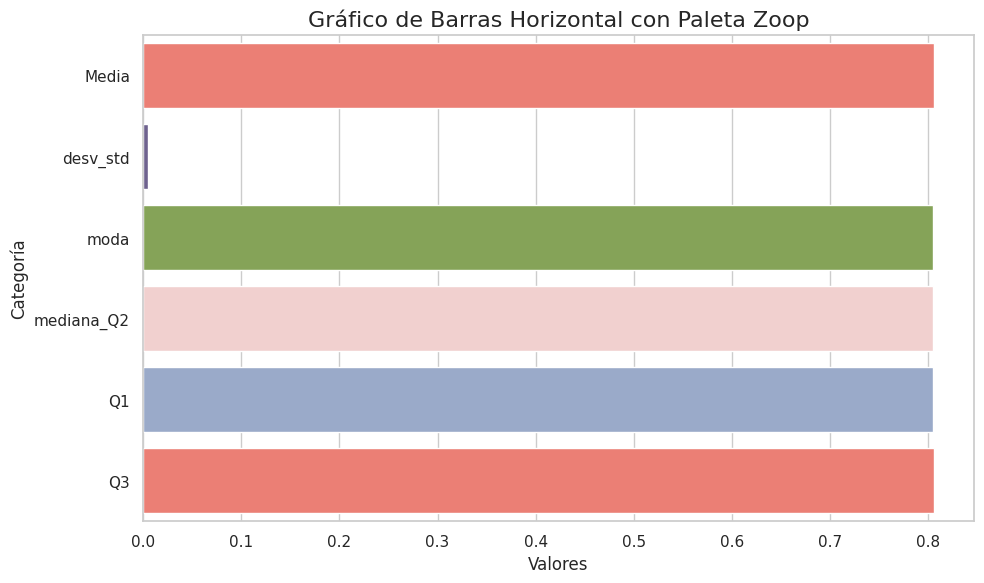

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos de ejemplo
data = pd.DataFrame({
    'Categoría': ['Media', 'desv_std', 'moda', 'mediana_Q2', 'Q1','Q3'],
    'Valores': [0.806511, 0.004926, 0.805298, 0.805298, 0.805298,0.805556]
})


# Estilo y paleta Zoop
sns.set_style("whitegrid")
zoop_palette = sns.color_palette(["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1"])

# Crear gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x='Valores', y='Categoría', data=data, palette=zoop_palette)

# Títulos y etiquetas
plt.title('Gráfico de Barras Horizontal con Paleta Zoop', fontsize=16)
plt.xlabel('Valores')
plt.ylabel('Categoría')

plt.tight_layout()
plt.show()

<div align='justify'>

#Entre las estrategias evaluadas, el modelo entrenado con SMOTE externo se posiciona como el más eficaz en la detección de clientes en riesgo de churn. Con un recall promedio de 0.81 y un intervalo de confianza estrecho (0.80–0.81), logra identificar la mayor proporción de casos positivos, reduciendo los falsos negativos a 718. Esta consistencia sugiere una generalización robusta, se complementó el análisis con métricas de precisión para evaluar el costo de posibles falsos positivos, lo cual indica que el modelo ttiene alta estabilidad (desviación baja), la moda, mediana y Q2 coinciden (distribución muy concentrada), el rango entre Q3-Q2 = 0.0068 es estrecho, por lo tanto hay consistencia entre folds.

</div>